### 필수과제 
- 대통령선거 데이터를 가지고 실제로 코사인 유사도를 계산했을 때 리뷰랑 비슷한 내용은 어떤 게 있는지 코드로 정리해서 알려주세요!
- 기존 과제 기반으로해서 동일하게 한 번 진행

In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 1s (252 kB/s)
Reading package lists... Done
^C
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mecab-ko is already installed
mecab-ko

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/tweet_jae.csv')
df.head()

,status_id,screen_name,created_at,text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n..."
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,..."
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...


#### 전처리
- 코사인 유사도가 높은 것의 전처리하기전 text를 비교하기 위해 새로운 칼럼에  추가하는 방식으로 진행

In [7]:
df['kor_text'] = df['text'].str.replace('[^가-힣|\s]', '').to_frame() # 한글과 띄어쓰기를 제외하고 제거하여 kor_text라는 새로운 컬럼

<ipython-input-7-a4a203b0c569>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kor_text'] = df['text'].str.replace('[^가-힣|\s]', '').to_frame() # 한글과 띄어쓰기를 제외하고 제거하여 kor_text라는 새로운 컬럼


In [8]:
df

,status_id,screen_name,created_at,text,kor_text
0,1295242650363154433,park_pyung,2020-08-17 06:14:46,-&gt; (지난 7개월 동안은 엎치락뒤치락 안 했는데?) 본격화되지 않았던 것\n...,지난 개월 동안은 엎치락뒤치락 안 했는데 본격화되지 않았던 것\n\n 이재명은 적...
1,1294137207121297409,Otranso2,2020-08-14 05:02:08,"""차기선호도 이재명 19% 이낙연 17%…첫 역전""(종합)https://t.co/n...",차기선호도 이재명 이낙연 첫 역전종합
2,1294285873027014656,hyoker3690,2020-08-14 14:52:53,"안철수 시즌2라~~~ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ [‘이낙연 대세론’ 흔들…이재명,...",안철수 시즌라 이낙연 대세론 흔들이재명 여권 추락 속 홀로 날
3,1294154164272939009,hyoker3690,2020-08-14 06:09:31,조작미터도 모자라 갤럽까지 제대로 미쳤군.\n대통령과 당 지지율이 떨어졌는데\n이재...,조작미터도 모자라 갤럽까지 제대로 미쳤군\n대통령과 당 지지율이 떨어졌는데\n이재명...
4,1294092935877652480,Sunny38251,2020-08-14 02:06:13,@yonhaptweet SNS로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이...,로 폭우막는 이재명이랑 수해현장 가서 구슬땀 흘리는 이낙연\n당연히 이낙연 아닌가...
...,...,...,...,...,...
8561,1293704470996557824,QVh027,2020-08-13 00:22:36,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...,이재명이가 추진하고 있는 토지 공개념화에 대한 대법원 판례가 규제를 인정했다고 해서...
8562,1293706115528527873,hezii631,2020-08-13 00:29:08,인물열전] 이재명에게서 노무현을 보다…“진짜 민주주의를 향한 위대한 발걸음”\n온라...,인물열전 이재명에게서 노무현을 보다진짜 민주주의를 향한 위대한 발걸음\n온라인| \...
8563,1293704734507859969,junsun88,2020-08-13 00:23:39,@Jaemyung_Lee 믿을 사람은 이재명뿐이요 ㅡ토지거래허가제 당장해서 실...,믿을 사람은 이재명뿐이요 토지거래허가제 당장해서 실거주가 아니면 못사게 ...
8564,1293704250019549184,hjg002,2020-08-13 00:21:43,"뻐꾹이와 이재명, 김경수까지 변호를? 그 피데스 동지들이 법을 유린하고 있다 많이 ...",뻐꾹이와 이재명 김경수까지 변호를 그 피데스 동지들이 법을 유린하고 있다 많이 배워...


In [9]:
from konlpy.tag import Twitter

In [10]:
with open('/content/drive/MyDrive/Colab Notebooks/BDAA 학회/데이터셋/korean_stopwords.txt', encoding = 'utf8') as stopword:
  stopwords = stopword.readlines()
# 한국어 불용어를 txt파일로 만들어 불러옴
# 출처 : https://www.ranks.nl/stopwords/korean

In [11]:
stopwords = [stopword.strip() for stopword in stopwords] # stopword를 list comprehension 을 이용하여 저장
                                                         # strip() 메서드는 원래 문자열의 양쪽의 공백을 제거한 문자열을 리턴
all_words_df = pd.DataFrame()
parts =['Noun']

for i in range(1000):  # 약 9000여개의 데이터 중 1000개의 데이터만 이용
    text = df['kor_text'].iloc[i]
    twt = Twitter()
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for n in words:
        if n =='EOS' or n =="":continue
        word_tmp = n[0]
        part = n[1]
        if not (part in parts):continue
        if word_tmp in stopwords:continue
        words_df[word_tmp] = [1]
 
    all_words_df = pd.concat([all_words_df, words_df], ignore_index = True)

/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.

In [12]:
all_words_df = all_words_df.fillna(0) # 결측치를 0으로 처리
all_words_df

,지난,개월,엎치락뒤치락,안,본격,이재명,적극,행보,이낙연,최근,...,친목질,뻥,혼비백산,필러,충만,편파,강도,제목,지하,곤
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


#### 코사인 유사도
코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

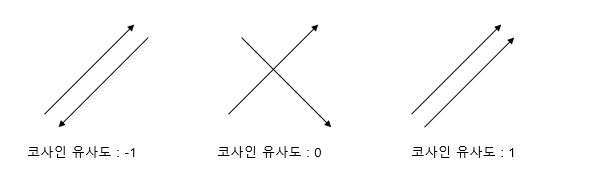
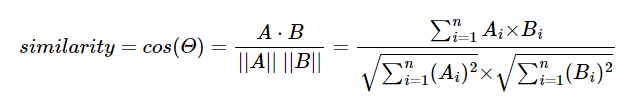

In [13]:
all_words = []
parts =['Noun']
for i in range(1000):
    text = df['kor_text'].iloc[i]
    twt = Twitter()
    words = twt.pos(text)
    words_arr = []
    for n in words:
        if n == 'EOS' or n == "" : continue
        word_tmp = n[0]
        part = n[1]
        if not (part in parts) : continue
        if word_tmp in stopwords : continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)

/usr/local/lib/python3.9/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [25]:
print(all_words)

['지난', '개월', '엎치락뒤치락', '안', '본격', '이재명', '적극', '행보', '이낙연', '행보', '최근', '현안', '대한', '태도', '한번', '보라', '참고', '사랑', '교회', '목사', '관련', '이낙연', '의원', '직접', '기한', '상태', '이재명', '경기도', '대변인', '통해', '언급', '차기', '선호', '이재명', '이낙연', '첫', '역전', '종합', '안철수', '시즌', '이낙연', '세론', '이재명', '여권', '추락', '속', '홀로', '날', '조작', '모자라', '갤럽', '제대로', '대통령', '당', '지지율', '이재명', '오른', '이유', '뭔가', '조작', '이재명', '이낙연', '차기', '정치인', '선호', '역전', '폭우', '이재명', '수해', '현장', '구슬', '땀', '이낙연', '이낙연', '전', '고추', '점', '이재명', '지지', '자건', '이낙연', '지지', '자건', '문재인', '뭐', '어쩌', '이낙연', '회피', '이재명', '뻥카', '유튜브', '결론', '안철수', '대표', '이재명', '안철수', '이낙연', '안철수', '대도', '정치권', '화두', '지지율', '희비', '여권', '중진', '부동산', '정책', '영향', '이재명', '이낙연', '박주민', '민주당', '김', '남국', '이낙연', '의원', '현안', '대해', '태도', '보이', '이재명', '도지사', '사이다', '얘기', '보', '지지율', '유권자', '문제해결', '능력', '가르마', '리더십', '찢빠', '찢', '정치', '갤럽', '민주당', '지층', '이낙연', '이재명', '통합', '지층', '이낙연', '명', '정의당', '지층', '이낙연', '명', '무당', '층', '이낙연', '명', '호남', '이낙연', '명', '부울경', '이낙연', '명', '이낙연', '의원님

In [15]:
# counting
all_words_count_df = pd.DataFrame({'words':all_words, 'count':len(all_words)*[1]})
all_words_count_df = all_words_count_df.groupby('words').sum().sort_values('count', ascending = False)
all_words_count_df = all_words_count_df[all_words_count_df['count'] > 100]
all_words_count_df

,count
words,
이재명,1398
이낙연,1202
위,270
지지율,267
후보,266
차기,247
대권,238
민주당,229
대선,221


In [16]:
import seaborn as sns

Text(0, 0.5, '출현 빈도')

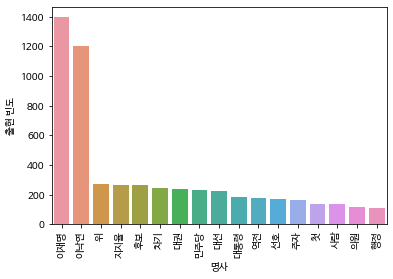

In [17]:
# 출현 빈도 시각화
sns.barplot(x = all_words_count_df.index, y = 'count', data = all_words_count_df) 
plt.xticks(rotation = 90)
plt.xlabel('명사')
plt.ylabel('출현 빈도')

In [18]:
target_text = all_words_df.iloc[1] # 첫 문장을 target으로 선정

In [19]:
import numpy as np

In [20]:
# 코사인 유사도 계산
cos_sim = []

for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text)*np.linalg.norm(cos_text)) # 코사인 유사도 식 
    cos_sim.append(cos)

In [21]:
all_words_df['cos_sim'] = cos_sim # 계산한 코사인 유사도를 all_words_df에 저장
all_words_df.sort_values('cos_sim',ascending=False) # 코사인 유사도가 높은 것 부터 출력

,지난,개월,엎치락뒤치락,안,본격,이재명,적극,행보,이낙연,최근,...,뻥,혼비백산,필러,충만,편파,강도,제목,지하,곤,cos_sim
614,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935414
231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.935414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.129641
402,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127775
111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125988
385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101015


In [22]:
print(df['kor_text'].iloc[614]) # 유사도가 높은 것 비교 , 전처리 후 
print(df['kor_text'].iloc[231])

차기선호도 이재명  이낙연 첫 역전종합

이재명  이낙연 차기 주자 선호도 첫 역전됐다종합 


In [23]:
print(df['text'].iloc[614]) # 유사도 높은 것 비교, 전처리 하기전 원본 데이터
print(df['text'].iloc[231])

"차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)...
https://t.co/SeesImG6tC
이재명 19%, 이낙연 17%…차기 주자 선호도 첫 역전됐다(종합) https://t.co/HhbktCtWy4


In [24]:
# 코사인 유사도 1인 원본 text 비교
print(df['text'].iloc[614]) 
print(df['text'].iloc[761])
print(df['text'].iloc[1])

"차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)...
https://t.co/SeesImG6tC
"차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)https://t.co/HkWQFBWoSd
"차기선호도 이재명 19% 이낙연 17%…첫 역전"(종합)https://t.co/nLZgiTmqI4
